In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Cálculos necessários 

In [2]:
cubagem_secao = pd.read_csv('/content/BR-SANTAVERONICA-DB-02 - Cubagem.csv', encoding='latin-1', sep =';', on_bad_lines='skip')
cubagem_secao.columns 

Index(['Código da Árvore', 'DAP', 'HT', 'Altura da secção',
       'Diâmetro da secção', 'Espessura da casca', 'talhao',
       'material_genetico_cod', 'idade', 'V5casca'],
      dtype='object')

In [3]:
# cálculo da área secional
cubagem_secao['AS'] = np.pi*(cubagem_secao['Diâmetro da secção'].pow(2)) / 40000

In [4]:
# cálculo Smalian para volume total 

cubagem_secao['Vtotalcasca'] = 0

for i in range(0,len(cubagem_secao['AS'])-1):
 
  if cubagem_secao['Código da Árvore'].loc[i] ==  cubagem_secao['Código da Árvore'].loc[i+1]:

       cubagem_secao['Vtotalcasca'].loc[i] =  ((cubagem_secao['AS'].loc[i]+cubagem_secao['AS'].loc[1+i])/2)*(cubagem_secao['Altura da secção'].loc[i+1]-cubagem_secao['Altura da secção'].loc[i])

  else: 

     cubagem_secao['Vtotalcasca'][i] = 0  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
soma = cubagem_secao[['Código da Árvore','V5casca','Vtotalcasca']].groupby('Código da Árvore').sum()

In [9]:
media = cubagem_secao[['Código da Árvore','DAP', 'HT']].groupby('Código da Árvore').mean()

In [10]:
cubagem = pd.merge(media, soma, how = 'inner', on = 'Código da Árvore')

In [11]:
cubagem.head() 

,DAP,HT,V5casca,Vtotalcasca
Código da Árvore,,,,
1,12.00,24.8,0.110448,0.110453
2,12.50,26.4,0.131897,0.131912
3,13.00,27.3,0.131415,0.131417
4,13.00,28.4,0.157841,0.157843
5,13.75,26.9,0.167208,0.167211


In [12]:
cubagem['lnDAP'] = np.log(cubagem['DAP'])

In [13]:
cubagem['lnHT'] = np.log(cubagem['HT'])

In [14]:
cubagem['lnVtcasca'] = np.log(cubagem['Vtotalcasca'])

In [15]:
cubagem['lnV5casca'] = np.log(cubagem['V5casca'])

In [16]:
cubagem.head()

,DAP,HT,V5casca,Vtotalcasca,lnDAP,lnHT,lnVtcasca,lnV5casca
Código da Árvore,,,,,,,,
1,12.00,24.8,0.110448,0.110453,2.484907,3.210844,-2.203169,-2.203208
2,12.50,26.4,0.131897,0.131912,2.525729,3.273364,-2.025622,-2.025735
3,13.00,27.3,0.131415,0.131417,2.564949,3.306887,-2.029378,-2.029399
4,13.00,28.4,0.157841,0.157843,2.564949,3.346389,-1.846155,-1.846166
5,13.75,26.9,0.167208,0.167211,2.621039,3.292126,-1.788496,-1.788517


In [17]:
cubagem.columns

Index(['DAP', 'HT', 'V5casca', 'Vtotalcasca', 'lnDAP', 'lnHT', 'lnVtcasca',
       'lnV5casca'],
      dtype='object')

In [18]:
#cubagem.to_csv('Cubagem.csv')

#Gráficos de tendência volume seção

Gráfico de tendência 




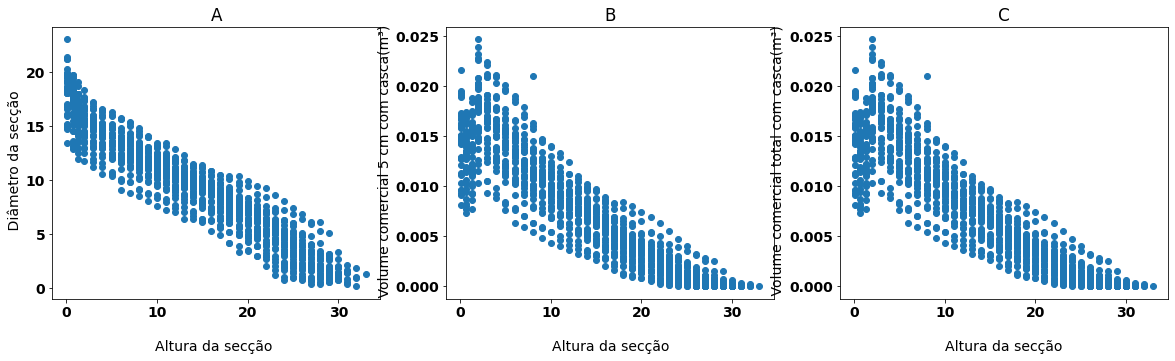

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

print('Gráfico de tendência ')
print('\n')

ax1.plot(cubagem_secao['Altura da secção'],cubagem_secao['Diâmetro da secção'], 'o' )
ax2.plot(cubagem_secao['Altura da secção'],cubagem_secao['Vtotalcasca'], 'o')
ax3.plot(cubagem_secao['Altura da secção'],cubagem_secao['V5casca'], 'o')

ax1.set(title="A", xlabel="\nAltura da secção ", ylabel=" Diâmetro da secção");

ax2.set(title="B", xlabel= f"\nAltura da secção", ylabel=" Volume comercial 5 cm com casca(m³)");

ax3.set(title="C", xlabel= f"\nAltura da secção",ylabel=" Volume comercial total com casca(m³)");


#Gráficos de tendência volume totalizado

Gráfico de tendência 




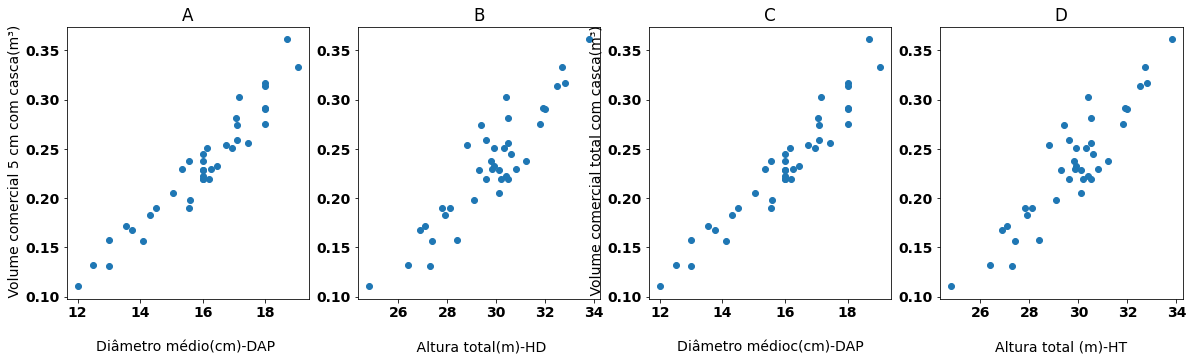

In [25]:
fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(1,4, figsize=(20,5))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

print('Gráfico de tendência ')
print('\n')

ax1.plot(cubagem['DAP'],cubagem['V5casca'], 'o' )

ax2.plot(cubagem['HT'],cubagem['V5casca'], 'o')

ax3.plot(cubagem['DAP'],cubagem['Vtotalcasca'], 'o')

ax4.plot(cubagem['HT'],cubagem['Vtotalcasca'], 'o')

ax1.set(title="A", xlabel=f"\nDiâmetro médio(cm)-DAP ", ylabel=" Volume comercial 5 cm com casca(m³)");

ax2.set(title="B", xlabel= f"\n Altura total(m)-HD");

ax3.set(title="C", xlabel= f"\nDiâmetro médioc(cm)-DAP",ylabel=" Volume comercial total com casca(m³)");

ax4.set(title="D", xlabel= f"\nAltura total (m)-HT");

#Schumacher e Hall para os modelos volumétricos

##Ajuste para volume total com casca

In [ ]:
X = cubagem[['lnDAP','lnHT']]

In [ ]:
y_Vtcasca =  cubagem['lnVtcasca']

In [ ]:
model_Vtcasca = LinearRegression().fit(X, y_Vtcasca)

In [ ]:
print("Regressão Linear (original)")
print("Coeficiente R^2 : {:.2f}".format(model_Vtcasca.score(X, y_Vtcasca)))

print("Descrição do modelo: ")
s = ["{0:0.2f}".format(v) for v in model_Vtcasca.coef_]
print("w: {}  b: {:.2f}".format(s, model_Vtcasca.intercept_))

Regressão Linear (original)
Coeficiente R^2 : 0.95
Descrição do modelo: 
w: ['1.74', '1.05']  b: -9.86


## Ajuste para volume 5 com casca 

In [ ]:
X = cubagem[['lnDAP','lnHT']]

In [ ]:
y_lnV5cmcasca =  cubagem['lnV5casca']

In [ ]:
model_lnV5cmcasca = LinearRegression().fit(X, y_lnV5cmcasca)

In [ ]:
print("Regressão Linear (original)")
print("Coeficiente R^2 : {:.2f}".format(model_lnV5cmcasca.score(X, y_lnV5cmcasca)))

print("Descrição do modelo: ")
s = ["{0:0.2f}".format(v) for v in model_lnV5cmcasca.coef_]
print("w: {}  b: {:.2f}".format(s, model_lnV5cmcasca.intercept_))

Regressão Linear (original)
Coeficiente R^2 : 0.95
Descrição do modelo: 
w: ['1.74', '1.05']  b: -9.86


#Predição

In [ ]:
estima_volume = pd.read_csv('/content/altura_predito.csv', encoding='latin-1', sep =';', on_bad_lines='skip')
estima_volume.head()

,Unnamed: 0,Talhao,Plantio,IdParcela,AreaParc,DataPlantio,DataColeta,Linha,Arvore,Fuste,Cap,Ht,Categoria1,CoordenadaX,CoordenadaY,DAP,lnHt,1/dap,Label,Hest
0,0,T-6,P-6,IFC_12_001,400,01/05/2010,26/09/2018,1,1,1,57.5,NaN,NORMAL,-5397725337,-2049390493,18.302818,NaN,0.054636,3.402592,30.04
1,1,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,5,1,58.0,NaN,NORMAL,-5397815827,-2049512442,18.461973,NaN,0.054165,3.421465,30.61
2,2,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,6,1,40.4,NaN,NORMAL,-5397815827,-2049512442,12.859719,NaN,0.077762,3.262036,26.10
3,3,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,1,1,56.5,NaN,NORMAL,-5397815827,-2049512442,17.984509,NaN,0.055603,3.410942,30.29
4,4,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,2,1,49.2,NaN,NORMAL,-5397815827,-2049512442,15.660846,NaN,0.063854,3.415056,30.42


In [ ]:
estima_volume['lnVtcasca'] = model_Vtcasca.intercept_ +  model_Vtcasca.coef_[0]* np.log(estima_volume['DAP']) +  model_Vtcasca.coef_[1] * np.log(estima_volume['Hest'])

In [ ]:
estima_volume['lnV5casca'] = model_lnV5cmcasca.intercept_+ model_lnV5cmcasca.coef_[0]* np.log(estima_volume['DAP']) + model_lnV5cmcasca.coef_[1] * np.log(estima_volume['Hest'])

In [ ]:
estima_volume['Vtcasca'] = np.exp(estima_volume['lnVtcasca'])
estima_volume['Vtcasca'].head()

0    0.292101
1    0.302427
2    0.136290
3    0.285766
4    0.225530
Name: Vtcasca, dtype: float64

In [ ]:
estima_volume['V5casca'] = np.exp(estima_volume['lnV5casca'])
estima_volume['V5casca'].head()

0    0.292088
1    0.302415
2    0.136285
3    0.285755
4    0.225524
Name: V5casca, dtype: float64

In [ ]:
estima_volume

,Unnamed: 0,Talhao,Plantio,IdParcela,AreaParc,DataPlantio,DataColeta,Linha,Arvore,Fuste,...,CoordenadaY,DAP,lnHt,1/dap,Label,Hest,lnVtcasca,lnV5casca,V5casca,Vtcasca
0,0,T-6,P-6,IFC_12_001,400,01/05/2010,26/09/2018,1,1,1,...,-2049390493,18.302818,NaN,0.054636,3.402592,30.04,-1.230657,-1.230700,0.292088,0.292101
1,1,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,5,1,...,-2049512442,18.461973,NaN,0.054165,3.421465,30.61,-1.195914,-1.195954,0.302415,0.302427
2,2,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,6,1,...,-2049512442,12.859719,NaN,0.077762,3.262036,26.10,-1.992967,-1.993010,0.136285,0.136290
3,3,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,1,1,...,-2049512442,17.984509,NaN,0.055603,3.410942,30.29,-1.252581,-1.252621,0.285755,0.285766
4,4,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,2,1,...,-2049512442,15.660846,NaN,0.063854,3.415056,30.42,-1.489303,-1.489329,0.225524,0.225530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1691,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,4,8,1,...,-2050786515,13.973804,3.230804,0.071562,3.224519,25.30,-1.880656,-1.880713,0.152481,0.152490
1650,1692,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,5,1,1,...,-2050786515,16.392959,3.328627,0.061002,3.326627,27.90,-1.500037,-1.500086,0.223111,0.223122
1651,1693,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,5,2,1,...,-2050786515,17.347889,3.377588,0.057644,3.347583,29.30,-1.350148,-1.350192,0.259190,0.259202
1652,1694,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,5,4,1,...,-2050786515,17.825354,3.230804,0.056100,3.332310,25.30,-1.456240,-1.456319,0.233093,0.233111


In [ ]:
estima_volume.to_csv('CalculoErroamostragem.csv')